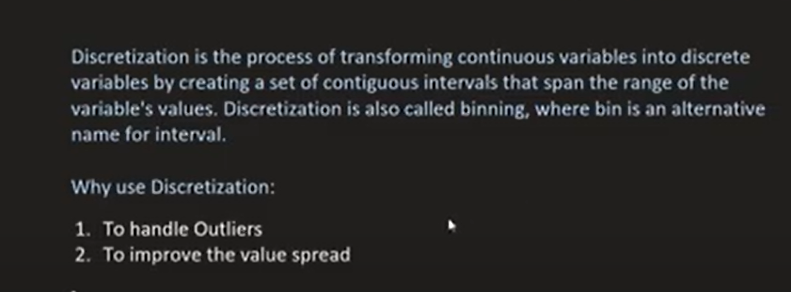

## Types Of Bining/ Discretization
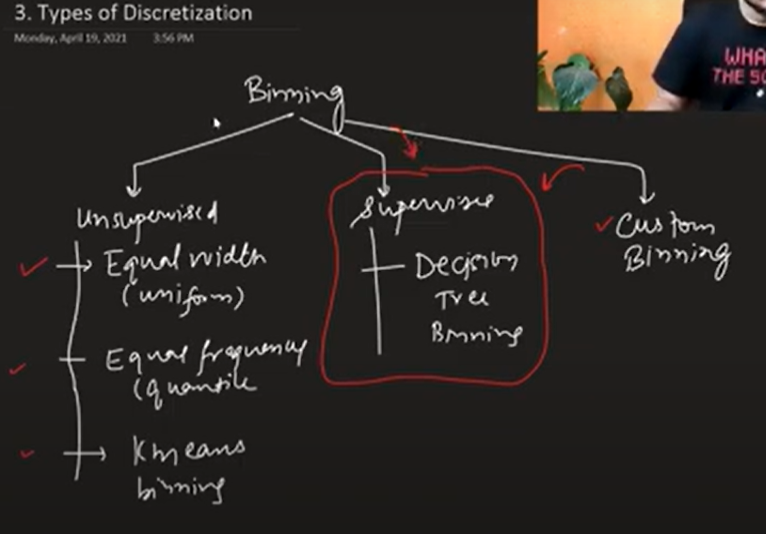

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])

In [7]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
885,0,39.0,29.1250
886,0,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [14]:
df.shape

(714, 3)

In [15]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [20]:
clf=DecisionTreeClassifier()

clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

In [21]:
accuracy_score(Y_pred,Y_test)

0.6293706293706294

In [22]:
np.mean(cross_val_score(clf,X,Y,cv=10,scoring="accuracy"))

0.6303012519561815

In [25]:
kbin_age=KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="quantile")
kbin_fare=KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="quantile")

#### In the above function KBinsDiscretizer() , yoiu have to pass the strategy of the bining such as<br> strategy="quantile","kmeans","uniform" , these are the strategies need to be passed while calling function also encoding type whether it is 'nominal' or 'ordinal' and number of bins<br> remember that number of columns affect the accuracy_score.

In [26]:
trf=ColumnTransformer([
    ("first",kbin_age,[0]),
    ("second",kbin_fare,[1])
])

In [27]:
X_train_trs=trf.fit_transform(X_train)
X_test_trs=trf.transform(X_test)

In [28]:
trf.named_transformers_["first"].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [32]:
output=pd.DataFrame({
    "age":X_train["Age"],
    "age_trs":X_train_trs[:,0],
    "fare":X_train["Fare"],
    "fare_trs":X_train_trs[:,1]
})

In [37]:
output["age_labels"]=pd.cut(x=X_train["Age"],bins=trf.named_transformers_["first"].bin_edges_[0].tolist())
output["fare_labels"]=pd.cut(x=X_train["Fare"],bins=trf.named_transformers_["second"].bin_edges_[0].tolist())

In [39]:
output.sample(5)

,age,age_trs,fare,fare_trs,age_labels,fare_labels
534,30.0,8.0,8.6625,4.0,"(28.0, 30.0]","(8.158, 10.5]"
271,25.0,6.0,0.0000,0.0,"(23.0, 25.0]",NaN
105,28.0,7.0,7.8958,3.0,"(25.0, 28.0]","(7.775, 7.896]"
321,27.0,6.0,7.8958,3.0,"(25.0, 28.0]","(7.775, 7.896]"
69,26.0,6.0,8.6625,4.0,"(25.0, 28.0]","(8.158, 10.5]"


In [41]:
clf1=DecisionTreeClassifier()

clf1.fit(X_train_trs,Y_train)
Y_pred=clf1.predict(X_test_trs)
accuracy_score(Y_pred,Y_test)

0.6363636363636364

In [45]:
X_trf=trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,Y,cv=10,scoring="accuracy"))

0.6723004694835681

Text(0.5, 1.0, 'Age after Binning')

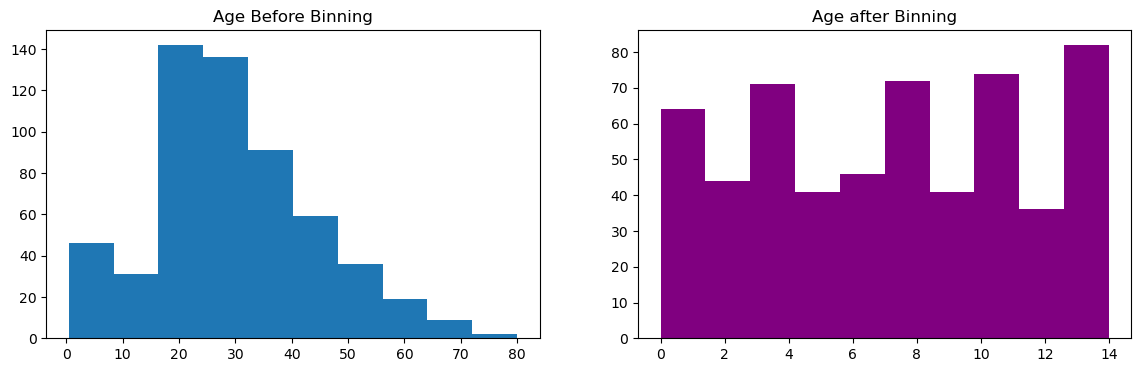

In [54]:
plt.figure(figsize=(14,4))

plt.subplot(121)
plt.hist(X_train["Age"])
plt.title("Age Before Binning",)

plt.subplot(122)
plt.hist(X_train_trs[:,0],color="purple")
plt.title("Age after Binning")


Text(0.5, 1.0, 'Fare after Binning')

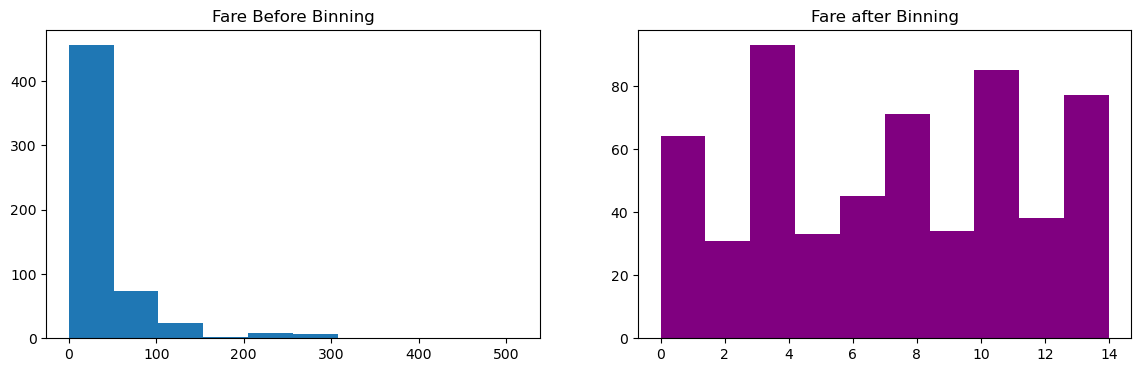

In [55]:
plt.figure(figsize=(14,4))

plt.subplot(121)
plt.hist(X_train["Fare"])
plt.title("Fare Before Binning")

plt.subplot(122)
plt.hist(X_train_trs[:,1],color="purple")
plt.title("Fare after Binning")


In [60]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()


### This function is use for Binnig you just have to past pass Strategy and the number of bins for the Binnig

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6330985915492958


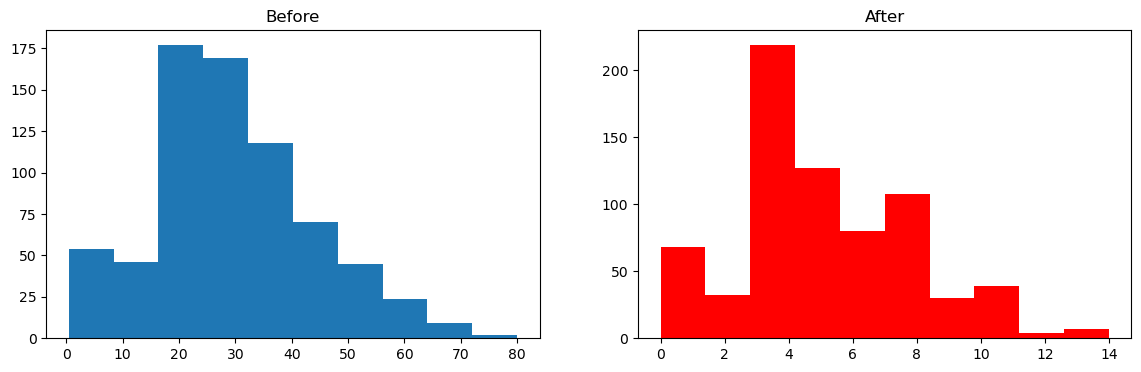

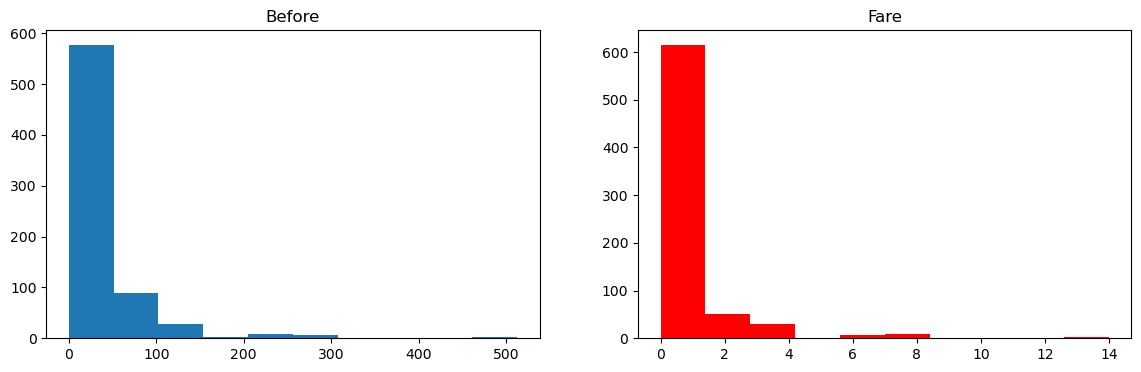

In [65]:
discretize(15,"uniform")

# Conclude